Downloading the dataset

In [1]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
# !wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-10-11 07:11:09--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  22.8MB/s    in 8.4s    

2020-10-11 07:11:18 (20.6 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [2]:
import scipy.io as sio
from keras.utils import to_categorical
import numpy as np

In [3]:
train_dat = sio.loadmat("train_32x32.mat")

In [88]:
print(train_dat['X'].T.shape[0])
print(train_dat['X'].shape[0])
print(y) # seems like there are 11 classes in original dataset
print(y.shape[1])

73257
32
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
11


In [48]:
n_samples = train_dat['X'].T.shape[0]
X = train_dat['X'].T
X = np.swapaxes(X, 1, 3)
y_ = train_dat['y'].flatten()
#to_categorical() method is used for one-hot encode integer data (Converts a class vector (integers) to binary class matrix)
y = to_categorical(y_)

#downloaded training set not used

# test_dat = sio.loadmat("test_32x32.mat")
# #n_samples = test_dat['X'].T.shape[0]
# X_test = test_dat['X'].T
# X_test = np.swapaxes(X_test, 1, 3)
# y_test_ = test_dat['y'].flatten()
# y_test = to_categorical(y_test_)

nepochs=5
nclasses = y.shape[1]

In [49]:
print(y)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using a pretrained ResNet50 CNN model which is already trained on 1000 object categories

In [57]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import  Input, Dense, Flatten
IMAGE_SIZE=[32, 32]
resnet = ResNet50(include_top=False,  pooling='none', input_shape=IMAGE_SIZE +[3],  weights='imagenet')
cfg = resnet.get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 32, 32, 1)
resnet_model = Model.from_config(cfg) 

#it is a 50 layer model and we will be adding an additional dense layer of size 7 
#marking layers to non-trainable. We are trusting the existing weights to work so no need to retrain those.


In [56]:
# for layers in resnet.layers:
#     layers.trainable= False

#Taking the output of the last convolution block in ResNet50

In [58]:
X=Flatten()(resnet.output)
#setting number of  output classes as nclasses

In [59]:
prediction=Dense(nclasses, activation='softmax',name="Abhishek_layer")(X)

# Model to be trained

In [60]:
model=Model(inputs=resnet.input, outputs=prediction)

In [32]:
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

#added a new layer to our model. Layer name Abhishek_layer

In [61]:
#set what cost and optimization method to use for our model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1832/1832 [==============================] - 63s 35ms/step - loss: 0.0845 - accuracy: 0.9750 - val_loss: 2.9189 - val_accuracy: 0.8948
Epoch 2/10
1832/1832 [==============================] - 63s 35ms/step - loss: 0.0663 - accuracy: 0.9800 - val_loss: 1.6114 - val_accuracy: 0.9090
Epoch 3/10
1832/1832 [==============================] - 63s 35ms/step - loss: 0.0573 - accuracy: 0.9824 - val_loss: 1.3000 - val_accuracy: 0.9088
Epoch 4/10
1832/1832 [==============================] - 64s 35ms/step - loss: 0.0536 - accuracy: 0.9829 - val_loss: 0.5996 - val_accuracy: 0.9014
Epoch 5/10
1832/1832 [==============================] - 64s 35ms/step - loss: 0.0487 - accuracy: 0.9838 - val_loss: 0.8840 - val_accuracy: 0.9137
Epoch 6/10
1832/1832 [==============================] - 64s 35ms/step - loss: 0.0514 - accuracy: 0.9841 - val_loss: 1.2257 - val_accuracy: 0.9161
Epoch 7/10
1832/1832 [==============================] - 63s 35ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 1.3445 -

In [64]:
import pandas as pd
print(pd.DataFrame(hist.history).iloc[-1])

loss            0.078383
accuracy        0.977749
val_loss        0.486901
val_accuracy    0.878310
Name: 9, dtype: float64


In [65]:
from glob import glob
import matplotlib.pyplot as plt

{'loss': [0.08450870215892792, 0.06630951166152954, 0.05728752538561821, 0.053638819605112076, 0.04874849319458008, 0.05136642977595329, 0.03960105776786804, 0.03671741113066673, 0.03861803188920021, 0.0783829391002655], 'accuracy': [0.9749509692192078, 0.9800358414649963, 0.9824076294898987, 0.982902467250824, 0.9838238954544067, 0.9841480851173401, 0.9874584078788757, 0.9887552261352539, 0.9871342182159424, 0.9777493476867676], 'val_loss': [2.91886043548584, 1.611391305923462, 1.299981713294983, 0.59961998462677, 0.8840100169181824, 1.2256566286087036, 1.3445379734039307, 2.461841106414795, 2.033566951751709, 0.486901193857193], 'val_accuracy': [0.8948266506195068, 0.9090226292610168, 0.9088178873062134, 0.9014468789100647, 0.9137319326400757, 0.9160524010658264, 0.8897761106491089, 0.9034261703491211, 0.886431872844696, 0.8783101439476013]}


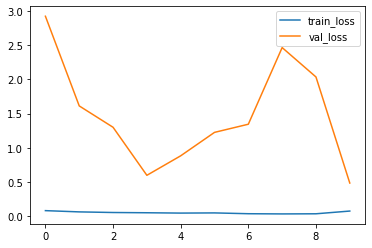

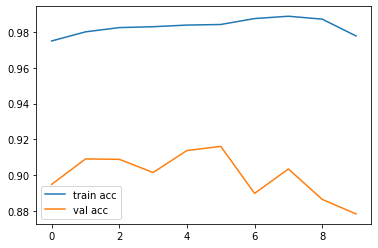

In [66]:
print(hist.history)
#plot the loss
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'] , label='val_loss')

plt.legend()

plt.savefig('LossVal_loss')
plt.show()

#plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('AccVal_acc')
plt.show()

(1, 32, 32, 3)
[[7.2942503e-12 7.3411390e-03 1.5571464e-02 2.7218112e-01 6.5205112e-04
  6.0298860e-02 1.9071288e-04 1.5838118e-02 3.6711101e-03 6.2314671e-01
  1.1087743e-03]]
[[7.294250273237601e-12, 0.007341139018535614, 0.015571463853120804, 0.27218112349510193, 0.0006520511233247817, 0.0602988600730896, 0.00019071287533733994, 0.01583811827003956, 0.0036711101420223713, 0.6231467127799988, 0.0011087743332609534]]


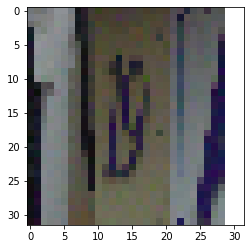

[9]


In [85]:
#for final verification
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.applications.resnet50 import preprocess_input
img=image.load_img('1.png', target_size=(32,32))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0) # just increasing the rank 
# x = preprocess_input(x)
print(x.shape)
a=model.predict(x)
print(a)
# print(np.exp(a))
# print(a[:][:1])
# list1=[model.predict(x)]
# print(list1)

arr=model.predict(x)
list1=arr.tolist()
print(list1)
a1=np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

(1, 32, 32, 3)
[[1.3379295e-13 4.5518455e-01 1.2685683e-01 3.4248465e-01 3.4454812e-03
  1.4005783e-02 1.1815463e-04 4.1969987e-03 5.9614335e-03 4.3085918e-02
  4.6602534e-03]]
[[1.3379294688201787e-13, 0.45518454909324646, 0.12685683369636536, 0.34248465299606323, 0.0034454811830073595, 0.014005783013999462, 0.00011815463221864775, 0.004196998663246632, 0.00596143351867795, 0.043085917830467224, 0.0046602534130215645]]


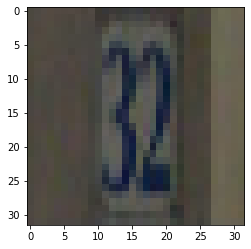

[1]


In [86]:
#for final verification
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.applications.resnet50 import preprocess_input
img=image.load_img('62.png', target_size=(32,32))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0) # just increasing the rank 
# x = preprocess_input(x)
print(x.shape)
a=model.predict(x)
print(a)
# print(np.exp(a))
# print(a[:][:1])
arr=model.predict(x)
list1=arr.tolist()
print(list1)
a1=np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

(1, 32, 32, 3)
[[5.1894714220290794e-11, 0.020172573626041412, 0.552254855632782, 0.0272467490285635, 0.13562746345996857, 0.00030690376297570765, 0.002280597807839513, 0.058304235339164734, 0.169438436627388, 0.0009413317893631756, 0.03342689573764801]]


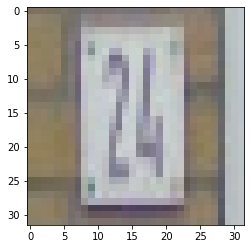

[2]


In [87]:
#for final verification
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.applications.resnet50 import preprocess_input
img=image.load_img('26.png', target_size=(32,32))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0) # just increasing the rank 
# x = preprocess_input(x)
print(x.shape)
# a=model.predict(x)
# print(a)
# print(np.exp(a))
# print(a[:][:1])

arr=model.predict(x)
list1=arr.tolist()
print(list1)
a1=np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

In [ ]:
# X_test=X_test[6]
# print(X_test.shape)

In [ ]:
# plot_images(X_train, 3, 6, y_train);